In [0]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Definieer wat waardes voor je k's
k1 = 100000000
k2 = 1
k3 = 100000000
k4 = 10
k5 = 0
k6 = 0
kLi = 0  # k for EL -> EL*
kLir = 0 # k for EL* -> EL

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 10*10**-9
EL0 = 0
ELi0 = 0 #(EL*)
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
Is = [1*10**-6, 0.5*10**-6, 0.25*10**-6, 0.15*10**-6, 0.075*10**-6, 0.04*10**-6, 0.02*10**-6, 10*10**-9, 5*10**-9, 2.5*10**-9, 1.0*10**-9, 0*10**-9] #lijst van concentraties
L0 = 1*10**-9
dt = 0.001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 60 #save a frame every 60 s
tincub = 0 #incubate for 1800 s with inhibitor
tsub = 1800 # Run with ligand for 1800 s

In [19]:
all_plots = []


for I0 in Is: # Loop over all I's
  concentraties = np.array([E0, EL0, ELi0, EI0, EIi0], dtype=np.double) #matrix van concentraties
  # Voor toevoeging van S
  plot = [concentraties.copy()]

  tijdconc = concentraties.copy()
  t = 0
  # Voor toevoging van S (tincub/dt stappen = 30min)
  for i in range(int(tincub/dt)):
    t+= 1
    I = I0 - (tijdconc[3]+tijdconc[4])
    L = 0
                            # [         E,       EL,    EL*,     EI, EI*]
    tijdevolutie0 = np.array([[-k3*I-k1*L,       k2,      0,     k4,   0],  #E
                              [      k1*L,  -k2-kLi,   kLir,      0,   0],  #EL
                              [         0,      kLi,  -kLir,      0,   0],  #EL*
                              [      k3*I,        0,      0, -k4-k5,  k6],  #EI
                              [         0,        0,      0,     k5, -k6]]) #EI*

    tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
    if (tijdconc < 0).any():
      raise ValueError("got a negative concentration, try decreasing dt")

    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst






  #verandering in E   = [E]*(-k3*I-k1*L) + [EL]*(k2)       + [EL*]*(0)     + [EI]*(k4)     + [EI*]*(0)
  #verandering in EL  = [E]*(k1*L)       + [ES]*(-k2-kLi)  + [EL*]*(kLir)  + [EI]*(0)      + [EI*]*(0)
  #verandering in EL* = [E]*(0)          + [ES]*(Kli)      + [EL*]*(-kLir) + [EI]*(0)      + [EI*]*(0)
  #verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [EL*]*(0)     + [EI]*(-k4-k5) + [EI*]*(k6)
  #verandering in EI* = [E]*(0)          + [ES]*(0)        + [EL*]*(0)     + [EI]*(k5)     + [EI*]*(-k6)

  # Na toevoeging van S (tsub/dt stappen)
  for i in range(int(tsub/dt)):
    L = L0 - (tijdconc[1] + tijdconc[2])
    I = I0 - (tijdconc[3] + tijdconc[4])
    
    tijdevolutie1 = np.array([[-k3*I-k1*L,       k2,      0,     k4,   0],  #E
                              [      k1*L,  -k2-kLi,   kLir,      0,   0],  #EL
                              [         0,      kLi,  -kLir,      0,   0],  #EL*
                              [      k3*I,        0,      0, -k4-k5,  k6],  #EI
                              [         0,        0,      0,     k5, -k6]]) #EI*

    t += 1
    tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
    if (tijdconc < 0).any():
      raise ValueError("got a negative concentration, try decreasing dt")

    if t % int(tframe/dt)==0:
        print(t)
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst

  all_plots.append(plot)

60000
120000
180000
240000
300000
360000
420000
480000
540000
600000
660000
720000
780000
840000
900000
960000
1020000
1080000
1140000
1200000
1260000
1320000
1380000
1440000
1500000
1560000
1620000
1680000
1740000
1800000
60000
120000
180000
240000
300000
360000
420000
480000
540000
600000
660000
720000
780000
840000
900000
960000
1020000
1080000
1140000
1200000
1260000
1320000
1380000
1440000
1500000
1560000
1620000
1680000
1740000
1800000
60000
120000
180000
240000
300000
360000
420000
480000
540000
600000
660000
720000
780000
840000
900000
960000
1020000
1080000
1140000
1200000
1260000
1320000
1380000
1440000
1500000
1560000
1620000
1680000
1740000
1800000
60000
120000
180000
240000
300000
360000
420000
480000
540000
600000
660000
720000
780000
840000
900000
960000
1020000
1080000
1140000
1200000
1260000
1320000
1380000
1440000
1500000
1560000
1620000
1680000
1740000
1800000
60000
120000
180000
240000
300000
360000
420000
480000
540000
600000
660000
720000
780000
840000
900000
9600

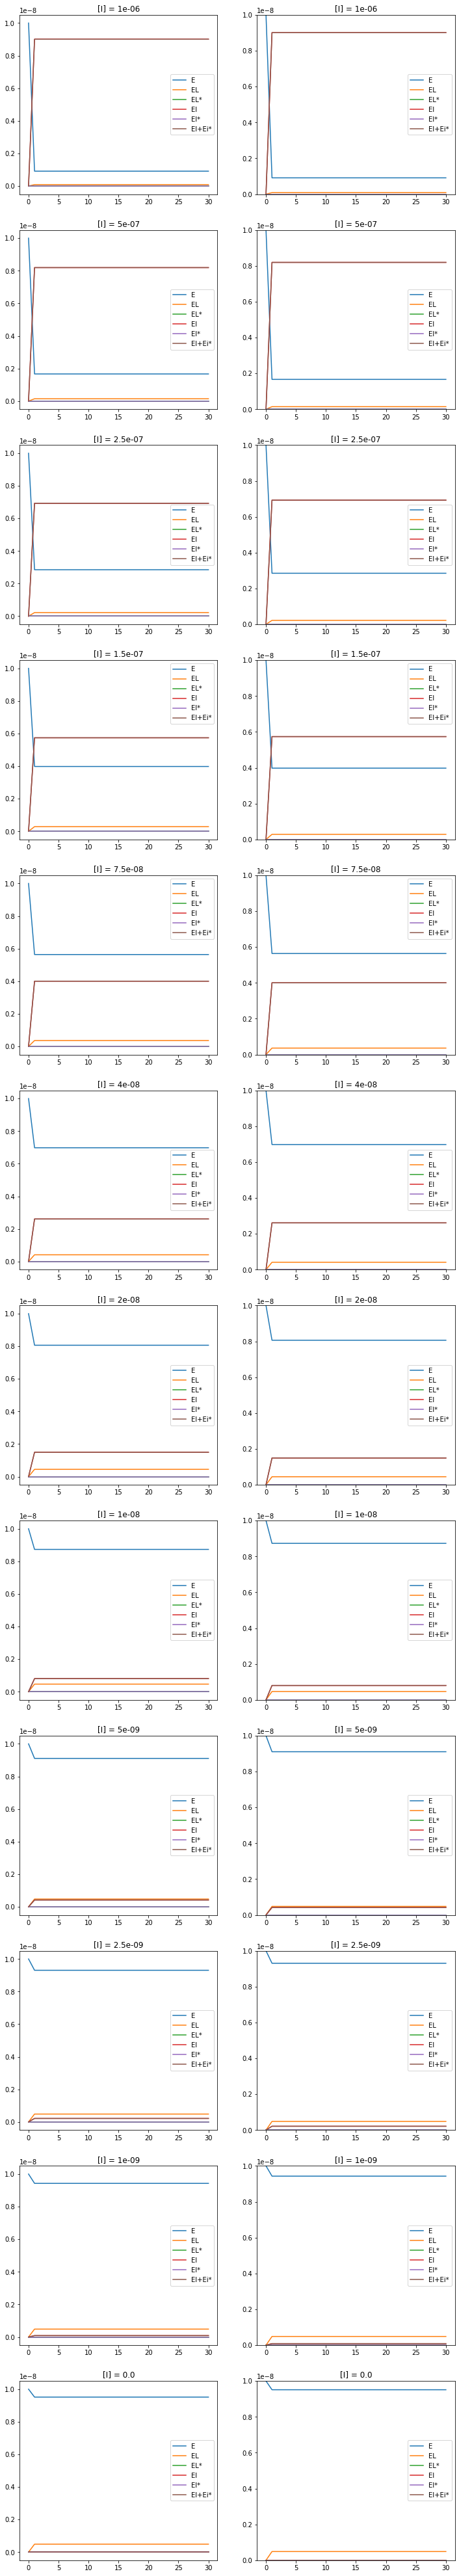

In [20]:
# This will make all the plots and dataframes
dataframes = []
fig, axes = plt.subplots(len(all_plots), 2, figsize=(12,len(all_plots)*6))
for n, plot in enumerate(all_plots):
  # Splits de lijst van figuren in E, EL, EL*, EI en EI*
  Eplot = [] 
  ESplot = []
  Pplot = []
  EIplot = []
  EIiplot = []
  EItot = []
  for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 
    
   # Plot de figuren
  labels = ('E', 'EL', "EL*", "EI", "EI*", "EI+Ei*")
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    axes[n,0].plot(y, label=labels[i])
  axes[n,0].legend()
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
      axes[n,1].plot(y, label=labels[i])
  axes[n,1].legend()
  axes[n,1].set_ylim(0,E0) #zoom in tot E0
  axes[n,0].set_title("[I] = {}".format(str(Is[n])))
  axes[n,1].set_title("[I] = {}".format(str(Is[n])))
  
  df = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "EL":ESplot, "EL*":Pplot})
  dataframes.append(df)
df = pd.concat(dataframes, keys=[I for I in Is], axis=1) # Combine all the dataframes

In [21]:
df
  

0.000001                                   ... 0.000000                        
               E            EI  EIi            EL  ...       EI  EIi            EL  EL*
0   1.000000e-08  0.000000e+00  0.0  0.000000e+00  ...      0.0  0.0  0.000000e+00  0.0
1   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
2   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
3   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
4   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
5   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
6   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
7   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
8   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
9   9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
10  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
11  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
12  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
13  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
14  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
15  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
16  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
17  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
18  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
19  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
20  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
21  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
22  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
23  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
24  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
25  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
26  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
27  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
28  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
29  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0
30  9.089595e-10  9.007718e-09  0.0  8.332229e-11  ...      0.0  0.0  4.875078e-10  0.0

[31 rows x 60 columns]

In [22]:
# Printing the values at timepoint
df.iloc[30]

1.000000e-06  E      9.089595e-10
              EI     9.007718e-09
              EIi    0.000000e+00
              EL     8.332229e-11
              EL*    0.000000e+00
5.000000e-07  E      1.665610e-09
              EI     8.191610e-09
              EIi    0.000000e+00
              EL     1.427795e-10
              EL*    0.000000e+00
2.500000e-07  E      2.850189e-09
              EI     6.928010e-09
              EIi    0.000000e+00
              EL     2.218013e-10
              EL*    0.000000e+00
1.500000e-07  E      3.977465e-09
              EI     5.737972e-09
              EIi    0.000000e+00
              EL     2.845627e-10
              EL*    0.000000e+00
7.500000e-08  E      5.637210e-09
              EI     4.002290e-09
              EIi    0.000000e+00
              EL     3.604997e-10
              EL*    0.000000e+00
4.000000e-08  E      6.979346e-09
              EI     2.609605e-09
              EIi    0.000000e+00
              EL     4.110492e-10
              

In [23]:
print(df.to_csv())

,1e-06,1e-06,1e-06,1e-06,1e-06,5e-07,5e-07,5e-07,5e-07,5e-07,2.5e-07,2.5e-07,2.5e-07,2.5e-07,2.5e-07,1.5e-07,1.5e-07,1.5e-07,1.5e-07,1.5e-07,7.5e-08,7.5e-08,7.5e-08,7.5e-08,7.5e-08,4e-08,4e-08,4e-08,4e-08,4e-08,2e-08,2e-08,2e-08,2e-08,2e-08,1e-08,1e-08,1e-08,1e-08,1e-08,5e-09,5e-09,5e-09,5e-09,5e-09,2.5e-09,2.5e-09,2.5e-09,2.5e-09,2.5e-09,1e-09,1e-09,1e-09,1e-09,1e-09,0.0,0.0,0.0,0.0,0.0
,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*,E,EI,EIi,EL,EL*
0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0,1e-08,0.0,0.0,0.0,0.0
1,9.089594744821421e-10,9.007718236476319e-09,0.0,8.33222890421661e-11,0.0,1.665610129866369e-09,8.191610357419495e-09,0.0,1.4277951271506447e-10,0.0,